## CIFAR 10

classification (10 classes) 

CIFAR 10 consists of: 60,000 tiny 32 x 32 color RGB images

labeled with integer 1 to 10 classes 

airplane (0), car (1), etc. 


In [1]:

import torch
import numpy as np
## import imageio
import os

import torch.optim as optim
import torch.nn as nn

from torchvision import datasets
from torchvision import transforms


In [2]:
data_path = 'data/cifar10data/'

cifar10 = datasets.CIFAR10(data_path, train=True, download=True)

Files already downloaded and verified


In [3]:
cifar10_val = datasets.CIFAR10(data_path, train=False, download=True)

Files already downloaded and verified


In [4]:
cifar10 = datasets.CIFAR10(data_path, train=True, download=False)

In [5]:
print(cifar10)

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: data/cifar10data/
    Split: Train


In [6]:
img, label = cifar10[99]

In [7]:
label

1

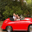

In [8]:
img

In [9]:
print(   dir(transforms)   )

['AugMix', 'AutoAugment', 'AutoAugmentPolicy', 'CenterCrop', 'ColorJitter', 'Compose', 'ConvertImageDtype', 'FiveCrop', 'GaussianBlur', 'Grayscale', 'InterpolationMode', 'Lambda', 'LinearTransformation', 'Normalize', 'PILToTensor', 'Pad', 'RandAugment', 'RandomAdjustSharpness', 'RandomAffine', 'RandomApply', 'RandomAutocontrast', 'RandomChoice', 'RandomCrop', 'RandomEqualize', 'RandomErasing', 'RandomGrayscale', 'RandomHorizontalFlip', 'RandomInvert', 'RandomOrder', 'RandomPerspective', 'RandomPosterize', 'RandomResizedCrop', 'RandomRotation', 'RandomSolarize', 'RandomVerticalFlip', 'Resize', 'TenCrop', 'ToPILImage', 'ToTensor', 'TrivialAugmentWide', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_pil_constants', '_presets', 'autoaugment', 'functional', 'functional_pil', 'functional_tensor', 'transforms']


In [10]:
print(img)


<PIL.Image.Image image mode=RGB size=32x32 at 0x21E8B3CFA60>


In [11]:
to_tensor = transforms.ToTensor()
img_t = to_tensor(img)

print(img_t.shape)

torch.Size([3, 32, 32])


The transforms can be passed directly to tnhe entire dataset

In [14]:
tensor_cifar10 = datasets.CIFAR10(data_path, train=True, download=False, transform=transforms.ToTensor())

In [15]:
img_t , _ = tensor_cifar10[99]

In [16]:
print(img_t)

tensor([[[0.2431, 0.1961, 0.1804,  ..., 0.6549, 0.7176, 0.5373],
         [0.2471, 0.2157, 0.2039,  ..., 0.6392, 0.6706, 0.5686],
         [0.2275, 0.2510, 0.2196,  ..., 0.6000, 0.5882, 0.4824],
         ...,
         [0.6745, 0.5608, 0.5098,  ..., 0.3686, 0.5529, 0.5451],
         [0.7176, 0.5882, 0.3137,  ..., 0.3176, 0.5294, 0.5608],
         [0.8196, 0.7137, 0.5451,  ..., 0.2314, 0.5098, 0.6627]],

        [[0.2510, 0.1961, 0.1725,  ..., 0.6745, 0.7216, 0.5333],
         [0.2549, 0.2078, 0.1961,  ..., 0.6627, 0.6824, 0.5725],
         [0.2431, 0.2588, 0.2353,  ..., 0.6078, 0.6039, 0.5020],
         ...,
         [0.5294, 0.4314, 0.2196,  ..., 0.2941, 0.4235, 0.4118],
         [0.5725, 0.4627, 0.2510,  ..., 0.2824, 0.4627, 0.4902],
         [0.6824, 0.5922, 0.4275,  ..., 0.2118, 0.4667, 0.6118]],

        [[0.1725, 0.1020, 0.0745,  ..., 0.2706, 0.2980, 0.2824],
         [0.1451, 0.1020, 0.1059,  ..., 0.2392, 0.2941, 0.3020],
         [0.1412, 0.1451, 0.1451,  ..., 0.2431, 0.2510, 0.

## Normalize



In [17]:

imgs_list = [ img_t  for img_t, _ in tensor_cifar10 ]

imgs = torch.stack( imgs_list, dim=3 )



In [27]:
print(   imgs.shape   )

torch.Size([3, 32, 32, 50000])


In [29]:
view1 = imgs.view(3, -1)
print(view1.shape)


torch.Size([3, 51200000])


In [30]:
view1 = view1.mean(dim=1)
print(view1)

tensor([0.4914, 0.4822, 0.4465])


In [31]:
view2 = imgs.view(3, -1).std(dim=1)
print(view2)

tensor([0.2470, 0.2435, 0.2616])


In [32]:


transformed_cifar10 = datasets.CIFAR10(data_path, train=True, download= False,
                                      transform = transforms.Compose([
                                          transforms.ToTensor(),
                                          transforms.Normalize(view1, view2)
                                      ]))


transformed_cifar10_val = datasets.CIFAR10(data_path, train=False, download= False,
                                      transform = transforms.Compose([
                                          transforms.ToTensor(),
                                          transforms.Normalize(view1, view2)
                                      ]))



## Build dataset

In [33]:
label_map = {0:0, 2:1}

In [35]:
class_names = ['airplane', 'bird']

In [38]:
cifar2 = [  (img, label_map[label])  for img, label in transformed_cifar10 if label in [0, 2]    ]

In [39]:
cifar2_val = [  (img, label_map[label])  for img, label in transformed_cifar10_val if label in [0, 2]    ]

## Softmax

In [40]:
def softmax(x):
    return torch.exp(x) / torch.exp(x).sum()

In [41]:
x = torch.tensor(   [1.0, 2.0, 3.0 ]   )

In [43]:
print(   softmax(x).sum()   )

tensor(1.)



## Convert vectors from 32x32x3   to 1x3072


In [47]:

n_out = 2 

model_mlp = nn.Sequential(

          nn.Linear(3072, 512),
          nn.Tanh(),
          nn.Linear(512, n_out),
          nn.Softmax(dim=1)

)




In [53]:

## negative log likelihood

loss_fn = nn.NLLLoss()



## DataLoader


In [54]:

train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True)


In [55]:
model_fn = model_mlp

## Training process

In [56]:

learning_rate = 1e-2    ## 0.001

n_epochs = 100

optimizer = optim.SGD(  model_fn.parameters(), lr=learning_rate )



In [59]:

for epoch in range(n_epochs):
    for imgs, labels in train_loader:       ## imgs [64x3x32x32]
        ## print(imgs.shape)
        ## resize for network
        batch_size = imgs.shape[0]
        imgs_resized = imgs.view(batch_size, -1)    ## imgs_resized [64, 3072]
        ## print(imgs_resized.shape)
        outputs = model_fn(imgs_resized)
        loss = loss_fn(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    print(loss)


tensor(-0.6310, grad_fn=<NllLossBackward0>)
tensor(-0.8222, grad_fn=<NllLossBackward0>)
tensor(-0.6661, grad_fn=<NllLossBackward0>)
tensor(-0.7360, grad_fn=<NllLossBackward0>)
tensor(-0.5773, grad_fn=<NllLossBackward0>)
tensor(-0.7751, grad_fn=<NllLossBackward0>)
tensor(-0.7511, grad_fn=<NllLossBackward0>)
tensor(-0.7833, grad_fn=<NllLossBackward0>)
tensor(-0.8841, grad_fn=<NllLossBackward0>)
tensor(-0.8429, grad_fn=<NllLossBackward0>)
tensor(-0.7426, grad_fn=<NllLossBackward0>)
tensor(-0.8910, grad_fn=<NllLossBackward0>)
tensor(-0.8685, grad_fn=<NllLossBackward0>)
tensor(-0.5708, grad_fn=<NllLossBackward0>)
tensor(-0.9189, grad_fn=<NllLossBackward0>)
tensor(-0.7067, grad_fn=<NllLossBackward0>)
tensor(-0.8423, grad_fn=<NllLossBackward0>)
tensor(-0.8313, grad_fn=<NllLossBackward0>)
tensor(-0.7892, grad_fn=<NllLossBackward0>)
tensor(-0.8704, grad_fn=<NllLossBackward0>)
tensor(-0.9413, grad_fn=<NllLossBackward0>)
tensor(-0.9840, grad_fn=<NllLossBackward0>)
tensor(-0.7041, grad_fn=<NllLoss

KeyboardInterrupt: 